# How to Load Nanodet in PyTorch

This article is an introductory tutorial to infer nanodet with PyTorch.

**Note**, we suppose this notebook is in the root directory of nonadet!

## Install nanodet first

For us to begin with, PyTorch should be installed. TorchVision is also required since we will be using it as our model zoo.

A quick solution is to install via pip

```shell
pip install torch==1.7.1
pip install torchvision==0.8.2
```

or please refer to official site https://pytorch.org/get-started/locally/

PyTorch versions should be backwards compatible but should be used with the proper TorchVision version.

And then don't forget to install other dependencies.

```shell
pip install -r requirements.txt
```

Next enter the key part, let's install `nanodet`!

```shell
python setup.py develop
```

## Set Environmental Parameters

In [ ]:
!git clone https://github.com/RangiLyu/nanodet.git

Cloning into 'nanodet'...
remote: Enumerating objects: 2511, done.
remote: Total 2511 (delta 0), reused 0 (delta 0), pack-reused 2511
Receiving objects: 100% (2511/2511), 5.23 MiB | 17.28 MiB/s, done.
Resolving deltas: 100% (1468/1468), done.


In [ ]:
#%cd nanodet
!pwd
#%cd content


/content


In [ ]:
%cd nanodet

/content/nanodet


In [ ]:
#%cd ..
!pip install -r requirements.txt

In [ ]:
!python setup.py develop

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '1.0.0-alpha' to '1.0.0a0'
  warnings.warn(tmpl.format(**locals()))
running develop
running egg_info
writing nanodet.egg-info/PKG-INFO
writing dependency_links to nanodet.egg-info/dependency_links.txt
writing top-level names to nanodet.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'nanodet.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/nanodet.egg-link (link to .)
nanodet 1.0.0a0 is already the active version in easy-install.pth

Installed /content/nanodet
Processing dependencies for nanodet==1.0.0a0
Finished processing dependencies for nanodet==1.0.0a0


In [ ]:
import os
import cv2
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cuda')

In [ ]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

## Set Model Configuration and Logger

In [ ]:
from nanodet.util import cfg, load_config, Logger

In [ ]:
config_path = 'config/nanodet_custom_xml_dataset.yml'
#nanodet_custom_xml_dataset
model_path = 'nanodet_model_best_300epochs.pth'
image_path = 'imgs/2015-11-16_0744.jpg'
xml_path =  'xml/2015-11-16_0744.xml'

In [ ]:
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

## Set Model Predictor

In [ ]:
from demo.demo import Predictor
!pwd
print(model_path)

/content/nanodet
nanodet_model_best_300eUpdated.pth


In [ ]:
predictor = Predictor(cfg, model_path, logger, device=device)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet-Plus Head.


In [ ]:
meta, res = predictor.inference(image_path)

forward time: 0.271s | decode time: 0.071s | 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Detection output visualisation

In [ ]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

def cv2_imshow(a, convert_bgr_to_rgb=True):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
        a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
        convert_bgr_to_rgb: switch to convert BGR to RGB channel.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [ ]:
#to find bb from xml files
import xml.etree.ElementTree as ET

mytree = ET.parse('xml/2015-11-16_0744.xml')
myroot = mytree.getroot()
boxes = []
for x in myroot.findall('object'):
  box = x.find('bndbox')
  xmin = int(box.find('xmin').text)
  ymin =int(box.find('ymin').text)
  ymax = int(box.find('ymax').text)
  xmax = int(box.find('xmax').text)
  boxes.append([xmin,ymin,xmax,ymax])

boxes

[[263, 230, 401, 411], [536, 260, 638, 454]]

In [ ]:
# result = overlay_bbox_cv(meta['raw_img'], res[0], cfg.class_names, score_thresh=0.35)
result_image = predictor.visualize(res[0], meta, cfg.class_names, boxes, 0.5)


viz time: 0.001s


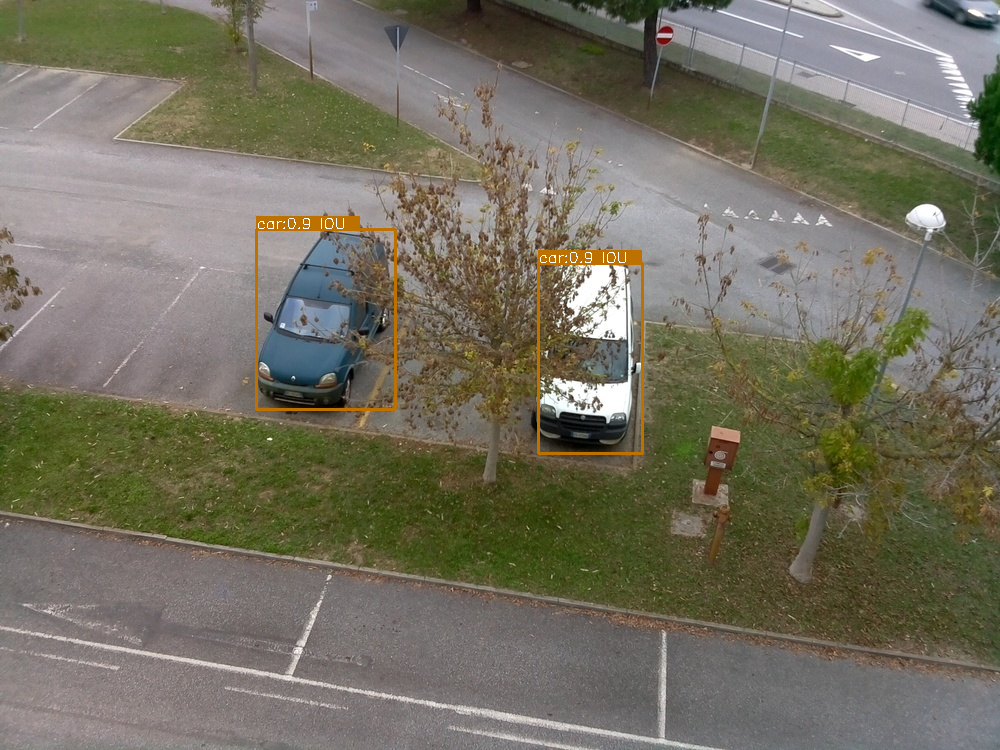

In [ ]:
imshow_scale = 1.0
cv2_imshow(cv2.resize(result_image, None, fx=imshow_scale, fy=imshow_scale))

In [ ]:
!python tools/train.py 'config/nanodet_custom_xml_dataset.yml'

[NanoDet][04-26 07:03:55]INFO:Setting up data...
creating index...
index created!
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
[NanoDet][04-26 07:03:55]INFO:Creating model...
INFO:NanoDet:Creating model...
model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet-Plus Head.
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/progress/progress.py:24: LightningDeprecationWarning: `ProgressBar` has been deprecated in v1.5 and will be removed